# Linear Discriminant Analysis Demo

## Discussion

**Linear Discriminant Analysis** is a popular technique for performing dimensionality reduction on a dataset. Dimensionality reduction is the reduction of a dataset from $n$ variables to $k$ variables, where the $k$ variables are some combination of the $n$ variables that preserves or maximizes some useful property of the dataset. In the case of Linear Discriminant Analysis, the new variables are chosen (and the data reprojected) in a way that maximizes the _linear separability_ of a certain set of classes in the underlying data.

In other words, given a dataset with $n$ variables, including an embedded set of labels that we want to predict, we can apply LDA to the data and reduce it to $k$ components, where those components are chosen in such a way that they maximize our ability to "draw lines" to distinguish the classes.

So for example, an ideal application of a two-component LDA reduction will look like this:

![](https://i.imgur.com/BERGLQv.png)

The technique was originally introduced by Fischer himself in the 1930s, making it one of the oldest techniques in the book.

An LDA transform is useful as a preprocessing step when modeling classes because it transforms the space in such a way that algorithms which then go and draw those boundaries, like support vector machines, perform much better on the transformed data than on the original projections.

However, it is also useful as an EDA technique. In this application, LDA can be compared to PCA. PCA is another dimensionality reduction technique (you can explore in detail in [this notebook](https://www.kaggle.com/residentmario/dimensionality-reduction-and-pca-for-fashion-mnist/)) that creates new variables that maximize the *variance* of the underlying dataset. As such, it functions in the absence of data labels (it is an unsupervised technique). LDA, meanwhile, is based on categorical labels, and creates new variables that maximize the *linear distinguishability* of the underlying dataset.

PCA is an interesting technique to try out on a broad variety of datasets because it will teach us how the variables are interact with one another, finding axes in the dataset which make intrinsic sense and might potentially even be worth creating new features for.

When we have meaningfully labelled data, LDA is another great technique to try out. Applying LDA to a dataset will tell us how linearly separable our dataset is (which, depending on the context, may also be a commentary on howmeaningful our labels are). That, in turn, is a good marker of how hard we will have to work to generate a model with reasonable classification performace. Furthermore, by looking at what variables load highly, we can determine what elements of the dataset are the strongest signals for each of our classes

## Mathematics

A mathematical sketch of LDA is as follows. Suppose that $f_k(x)$ is the conditional probability that a point with features $x$ is in the class $G=k$. Let $\pi_k$ is be the probability that any one of these classes will occur (e.g. so that $\sum_k \pi_k  = 1$).

Baye's theorem holds that:

$$P(G=k \: | \: X=x) = \frac{f_k(x)\pi_k}{\sum_{k} f_k(x) \pi_k}$$

Assume that all of the classes have a common covariance matrix ($\sum_k = \sum_k \forall k$) and that the classes are distributed as multivariate Gaussian distributions (e.g. each class of points is distributed normally across each of the $n$ variables).

Then we may look at the [log-odds](https://www.kaggle.com/residentmario/logistic-regression-with-wta-tennis-matches/) of two classes ($k$ and $l$), and find that:

$$\log{\frac{P(G=k\: | \: X=x)}{P(G=l \: | \: X=x)}} = \log{\frac{f_k(x)}{f_k(x)}} + \log{\frac{\pi_k}{\pi_l}}$$
$$= \log{\frac{\pi_k}{\pi_l} - \frac{1}{2}(\mu_k + \mu_l)^T \sum^{-1}(\mu_k - \mu_l)} + x^T \sum^{-1}(\mu_k - \mu_l)$$

What this all means mathematically is unimportant. What matters is that, due to the equal covariance matrix condition, the math simplifies to an equation linear in $x$ (the last line). Thus this is a statement that, given multivariate normal distributions with a common covariance matrix, the log-odds between any two classes is a linear function.

That in turn implies that the decision boundaries between any $k$ and $l$ (the set $\{x \: | \: P(G=k|X=x) = P(G=l|X=x)\}$, e.g. the set of points such that the probability of a point being in either one of these classes is 50/50) is linear as well. Convexity in turn implies that the separators between the classes are hyperplanes. Hence the optimal solution for this classification problem will be:

$$G(x) = \text{argmax}_k\left(\delta_k (x) = x^T \sum^{-1} \mu_k - \frac{1}{2} \mu_k^T \sum^{-1} \mu_k + \log{\mu_k}\right)$$

Which is a convex function of $x$, and hence can be proveably solved using [gradient descent](https://www.kaggle.com/residentmario/gradient-descent-with-linear-regression/) or related optimization algorithms.

So for the given set of conditions (Gaussian distributions and equal covariance matrices), LDA remaps the data to an ideally linearly separable space. These conditions are rarely met in practice exactly, but many classification task datasets are "close enough" to separability that LDA is a useful technique to try out on them.

## Application

In this notebook we will try using LDA for exploring the Cevital dataset. Our goal is to predict the type of source of oil.


## About the Iris Data Set

For the following tutorial, we will be working with the famous “Iris” dataset that has been deposited on the [UCI machine learning repository](https://archive.ics.uci.edu/ml/datasets/Iris)

The iris dataset contains measurements for 150 iris flowers from three different species.

The three classes in the Cevital dataset:

1. Raw Material (n=50)
2. Second Hand Material (n=50)
3. Final Product (n=50)

The four features of the Cevital dataset:

1. production cost in DZD
2. marketing cost  in DZD
3. warehousing cost in DZD
4. transportation cost in DZD


## The Libraries & Functions

Using Python 3.6.1, import the following libraries. Note the use of `%matplotlib inline`, allowing the display of graphs inline in iPython Notebook

## Documentation
[Scikit-Learn](http://scikit-learn.org/stable/documentation.html)<br>
[Pandas](http://pandas.pydata.org/pandas-docs/stable/)<br>
[Numpy](https://docs.scipy.org/doc/)<br>
[Seaborn](https://seaborn.pydata.org/index.html)<br>




### Prepare the Sample Data

problem:
1.How do you solve linear discriminant analysis?
2.What is the discriminant formula?
3.What is the main goal of LDA?


solution:
1.LDA in 5 steps
Step 1: Computing the d-dimensional mean vectors. ...
Step 2: Computing the Scatter Matrices. ...
Step 3: Solving the generalized eigenvalue problem for the matrix S−1WSB. ...
Step 4: Selecting linear discriminants for the new feature subspace.
    
2.This formula is used to find out whether the roots of the quadratic equation are real or imaginary. 
The Discriminant Formula in the quadratic equation ax2 + bx + c = 0 is. △ = b2 − 4ac.   

3.The aim of LDA is to maximize the between-class variance and minimize the within-class variance, through a linear discriminant function, under the assumption that data in every class are described by a Gaussian probability density function with the same covariance.

In [1]:
import pandas as pd

data = pd.read_csv('/kaggle/input/cevital-data/data.csv')
data.set_index("Id",inplace = True)
data.columns =  ['produ',
                  'transp',
                  'rate',
                  'marketing','class label']

display(data) # Shows Sample Data
data.info() # Shows informations data type and counts of Non-Null
data.describe()

,produ,transp,rate,marketing,class label
Id,,,,,
1,5.1,3.5,1.4,0.2,faible
2,4.9,3.0,1.4,0.2,faible
3,4.7,3.2,1.3,0.2,faible
4,4.6,3.1,4.7,0.2,faible
5,5.0,3.6,4.5,0.2,faible
...,...,...,...,...,...
146,6.7,3.0,4.7,2.3,fort
147,6.3,2.5,4.3,1.9,fort
148,6.5,3.0,5.2,2.0,fort


<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   produ        150 non-null    float64
 1   transp       150 non-null    float64
 2   rate         150 non-null    float64
 3   marketing    150 non-null    float64
 4   class label  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


,produ,transp,rate,marketing
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,4.327333,1.198667
std,0.828066,0.433594,0.987635,0.763161
min,4.300000,2.000000,1.300000,0.100000
25%,5.100000,2.800000,4.000000,0.300000
50%,5.800000,3.000000,4.500000,1.300000
75%,6.400000,3.300000,4.775000,1.800000
max,7.900000,4.400000,6.900000,2.500000


We will transform the class labels (Iris-setosa, Iris-versicolor, Iris-virginica)  to numeric values (1,2,3) for convenience. We can do this by simply calling a function called *LabelEndoder* from sckit-learn library. 

![](https://i.postimg.cc/MGWm84BC/IRIS-LABEL.png)

In [2]:
from sklearn.preprocessing import LabelEncoder

X = data.iloc[:,0:4].values
y = data['class label'].values

enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y) + 1
label_dict = {1: 'forte', 2: 'moyene', 3:'faible'}

le = LabelEncoder()
data['class label']= le.fit_transform(data['class label'].values)
data
data.corr()



,produ,transp,rate,marketing,class label
produ,1.000000,-0.109369,0.468686,0.817954,0.460039
transp,-0.109369,1.000000,-0.130416,-0.356544,-0.612165
rate,0.468686,-0.130416,1.000000,0.516678,0.198248
marketing,0.817954,-0.356544,0.516678,1.000000,0.580749
class label,0.460039,-0.612165,0.198248,0.580749,1.000000


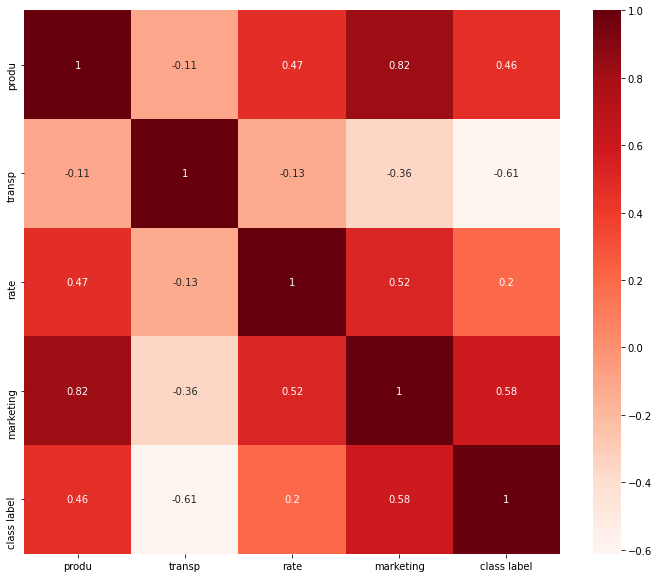

In [3]:
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.savefig("correlation matrix")
plt.show()

Just to get a rough idea how the samples of our three classes Setosa, Versicolor and Virginica are distributed, let us visualize the distributions of the four different features in 1-dimensional histograms.

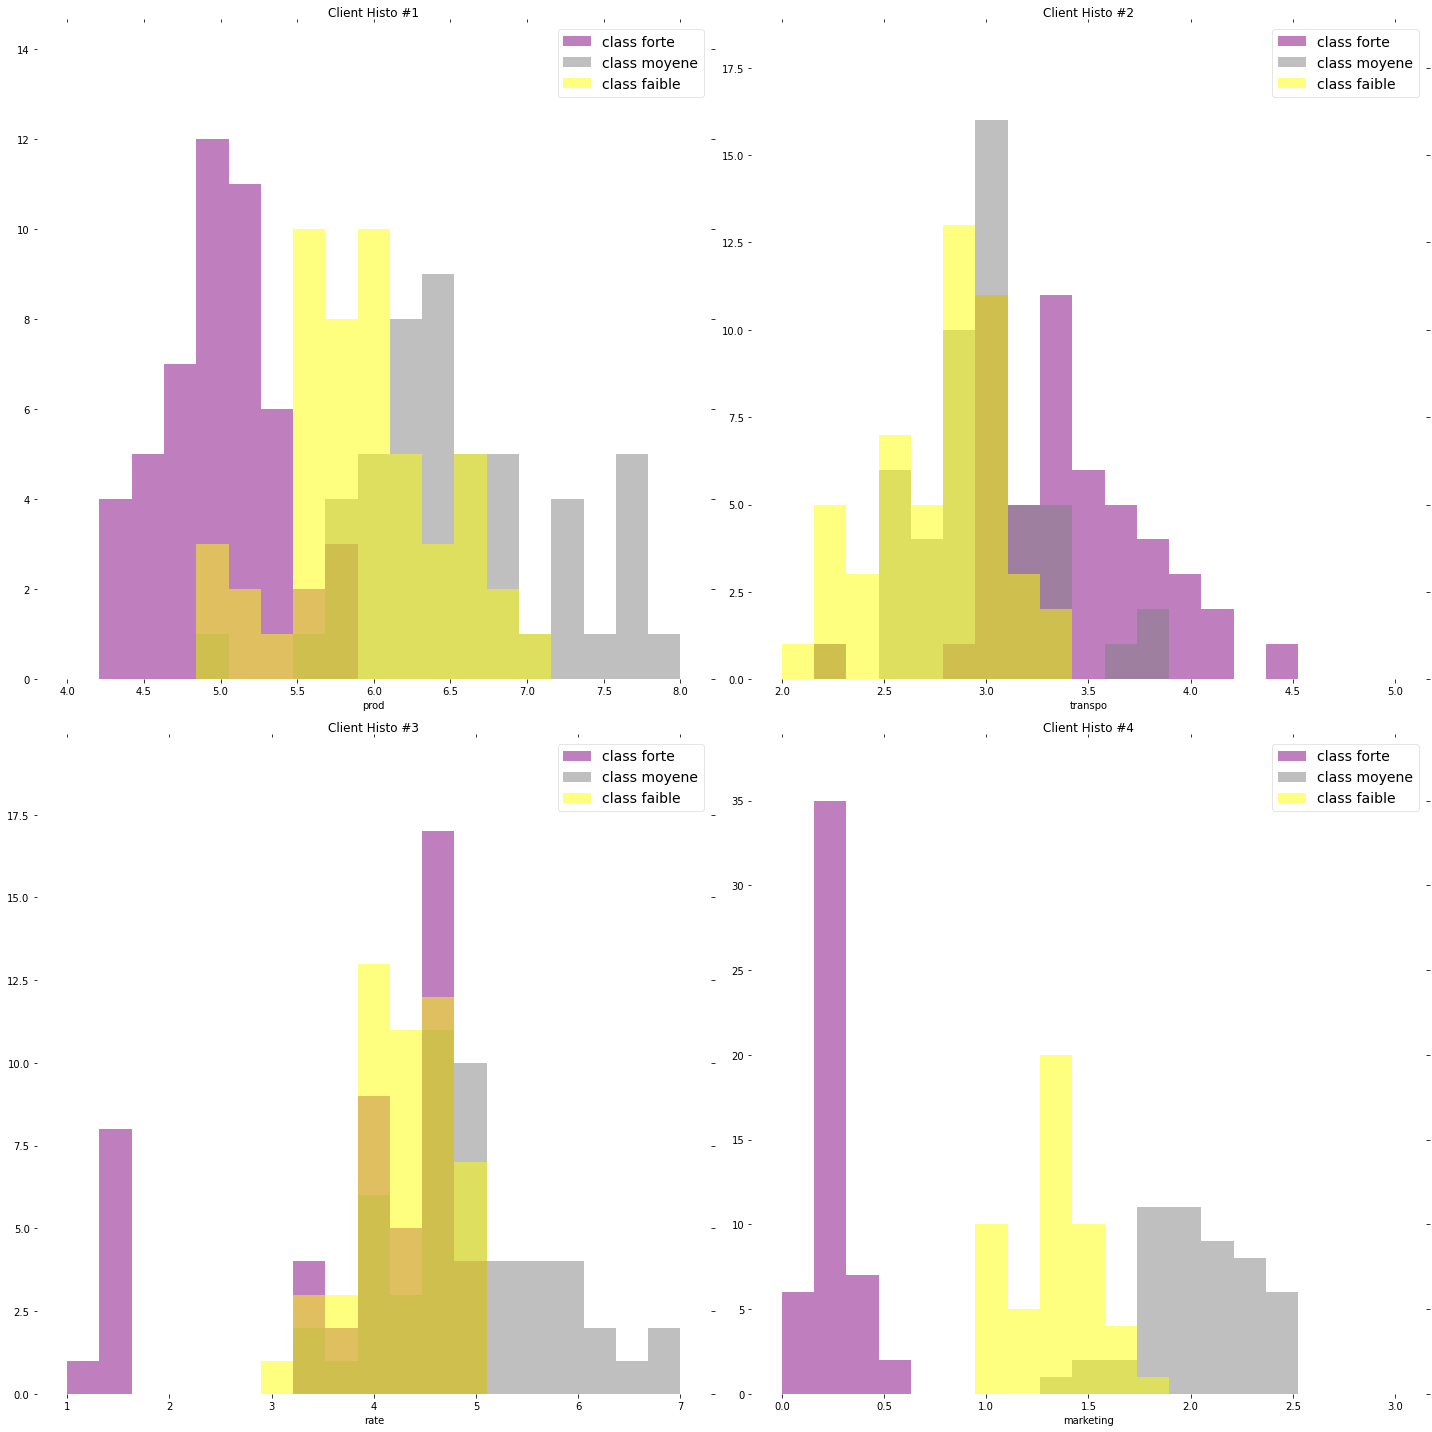

In [4]:
from matplotlib import pyplot as plt
import numpy as np
import math

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,20))

feature_dict = {i:label for i,label in zip(
                range(4),
                  ('prod',
                  'transpo',
                  'rate',
                  'marketing', ))}


for ax,cnt in zip(axes.ravel(), range(4)):  

    # set bin sizes
    min_b = math.floor(np.min(X[:,cnt]))
    max_b = math.ceil(np.max(X[:,cnt]))
    bins = np.linspace(min_b, max_b, 20)

    # plottling the histograms
    for lab,col in zip(range(1,4), ('purple', 'grey', 'yellow')):
        ax.hist(X[y==lab, cnt],
                   color=col,
                   label='class %s' %label_dict[lab],
                   bins=bins,
                   alpha=0.5,)
    ylims = ax.get_ylim()

    # plot annotation
    leg = ax.legend(loc='upper right', fontsize=14)
    leg.get_frame().set_alpha(0.5)
    ax.set_ylim([0, max(ylims)+2])
    ax.set_xlabel(feature_dict[cnt])
    ax.set_title('Client Histo #%s' %str(cnt+1))

    # hide axis ticks
    ax.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    


plt.tight_layout()
plt.savefig('data final')
plt.show()

In [5]:
plt.show()

From just looking at these simple graphical representations of the features, we can already tell that the petal lengths and widths are likely better suited as potential features two separate between the three flower classes. In practice, instead of reducing the dimensionality via a projection (here: LDA), a good alternative would be a feature selection technique. For low-dimensional datasets like Iris, a glance at those histograms would already be very informative. Another simple, but very useful technique would be to use feature selection algorithms; in case you are interested, I have a more detailed description on sequential feature selection algorithms [here](http://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/), and scikit-learn also implements a nice selection of alternative [approaches](https://scikit-learn.org/stable/modules/feature_selection.html).

## Normality assumptions

It should be mentioned that LDA assumes normal distributed data, features that are statistically independent, and identical covariance matrices for every class. However, this only applies for LDA as classifier and LDA for dimensionality reduction can also work reasonably well if those assumptions are violated. And even for classification tasks LDA seems can be quite robust to the distribution of the data:

> “linear discriminant analysis frequently achieves good performances in the tasks of face and object recognition, even though the assumptions of common covariance matrix among groups and normality are often violated (Duda, et al., 2001)” (Tao Li, et al., 2006).

Tao Li, Shenghuo Zhu, and Mitsunori Ogihara. “[Using Discriminant Analysis for Multi-Class Classification: An Experimental Investigation.](https://link.springer.com/article/10.1007/s10115-006-0013-y)” Knowledge and Information Systems 10, no. 4 (2006): 453–72.)

Duda, Richard O, Peter E Hart, and David G Stork. 2001. Pattern Classification. New York: Wiley.

## LDA via scikit-learn

LDA can be perform conveniently by calling the LDA class in the scikit-learn machine learning library.

## For Dimension Reduction

We will first try to use LDA to reduce the number of features. 
LDA reduces dimensionality from original number of feature to <br>(C—1) features, where C is the number of classes. In this case, we have 3 classes, therefore the new feature space will have only 2 features

In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Calling LDA
lda_as_dimension_reduction = LDA(n_components=2)
X_lda_sklearn = lda_as_dimension_reduction.fit_transform(X, y)

print('(Rows,Columns) of the original data is ',X.shape)
print('\n After LDA Dimension Reductionn we have', X_lda_sklearn.shape)

(Rows,Columns) of the original data is  (150, 4)

 After LDA Dimension Reductionn we have (150, 2)


Now, let’s express the “explained variance” as percentage:

In [7]:
## Explaning the varianvce for the new features created

print('Variance explained:\n')
for i,j in enumerate(lda_as_dimension_reduction.explained_variance_ratio_):
    print(f'LDA {i+1}: {j:.2%}')

Variance explained:

LDA 1: 98.81%
LDA 2: 1.19%


The LDA 1 is by far the most informative one, and we won’t loose much information if we would form a 1D-feature spaced based on this.

What we are going to do next is to visualize the 2 columns created by LDA and see how the class are separated.

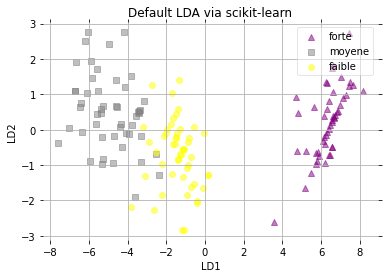

In [8]:
# Create a function for plotting 
def plot_scikit_lda(X, title):

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(1,4),('^', 's', 'o'),('purple', 'grey', 'yellow')):

        plt.scatter(x=X[:,0][y == label],
                    y=X[:,1][y == label] * -1, # flip the figure
                    marker=marker,
                    color=color,
                    alpha=0.5,
                    label=label_dict[label])

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title(title)

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.savefig("Dimension reduction")
    plt.show()
    
plot_scikit_lda(X_lda_sklearn, title='Default LDA via scikit-learn')

The scatter plot above represents our new feature subspace that we constructed via LDA. We can see that the first linear discriminant “LD1” separates the classes quite nicely. However, the second discriminant, “LD2”, does not add much valuable information,which we’ve already concluded when we looked at the ranked varianvce explained.

That's it we are able to use LDA to reduce the number of features from 4 to 2. 

## Classification

For the classification task, since we don't have a test dataset we are going to split our original data. 70% will be used for training the model and 30% will be used as validation.

To split our data we are going to call function *train_test_split* from scikit-learn library.

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.7, random_state=12345)
 
print("\nSize of the dataset")
print("All data:", X.shape)
print("Training:", X_test.shape)    
print("Validation:", X_train.shape) 
    
print("\nProportion of 'TARGETS' in the dataset")
print("All data:", np.bincount(y)[1:] / float(len(y)))
print("Validation:", np.bincount(y_test)[1:] / float(len(y_test))) 
print("Training:", np.bincount(y_train)[1:] / float(len(y_train)))        


Size of the dataset
All data: (150, 4)
Training: (105, 4)
Validation: (45, 4)

Proportion of 'TARGETS' in the dataset
All data: [0.33333333 0.33333333 0.33333333]
Validation: [0.33333333 0.33333333 0.33333333]
Training: [0.33333333 0.33333333 0.33333333]


In [10]:
# Transform data to follow assumption 2 regarding variance of the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)

# Scaling Train Set
X_train = scaler.transform(X_train)
# Scaling Test Set
X_test = scaler.transform(X_test)

In [11]:
lda_for_classification = LDA(shrinkage=None, solver='svd')
lda_for_classification.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [12]:
from sklearn.metrics import classification_report

# Score Training Data Set
y_true = y_train
y_pred = lda_for_classification.predict(X_train)
target_names = ['faible', 'moyene', 'fort']
print('Training REPORT')
print(classification_report(y_true, y_pred, target_names=target_names))

# Score Validation Data Set
y_true = y_test
y_pred = lda_for_classification.predict(X_test)
target_names = ['faible', 'moyene', 'fort']
print('Validation REPORT')
print(classification_report(y_true, y_pred, target_names=target_names))

Training REPORT
              precision    recall  f1-score   support

      faible       1.00      1.00      1.00        15
      moyene       1.00      0.93      0.97        15
        fort       0.94      1.00      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

Validation REPORT
              precision    recall  f1-score   support

      faible       1.00      1.00      1.00        35
      moyene       0.94      0.97      0.96        35
        fort       0.97      0.94      0.96        35

    accuracy                           0.97       105
   macro avg       0.97      0.97      0.97       105
weighted avg       0.97      0.97      0.97       105



That's it we are done with the implementation of LDA as a classifier. We are able to classify the IRIS dataset and have high performance metrics

## Conclusion
In this notebook we covered LDA (Linear Discriminant Analysis). LDA is a dimensionality reduction technique which is can be also use to classify categories. As an EDA technique it tells us a lot about the complexity of our problem, and tells us which classes are most easily distinguishable and why.

We are able to 

1) Implement LDA for Dimension Reduction. <br>
2) Implement LDA for Classification task. <br>